### Install required packages

In [68]:
!pip install  tensorflow==1.14.0
!pip install  keras==2.3.1

In [2]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt

Using TensorFlow backend.


#### Download MNIST dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

# convert y to categorical variable (vector)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Transform from matrix to vector
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_train = x_train.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_train /= 255

# Transform from matrix to vector
x_test = x_test.reshape(x_test.shape[0], image_size)
x_test = x_test.astype('float32')
# Normalize inputs from 0-255 to 0.0-1.0
x_test /= 255

In [73]:
print('Number of train examples:', x_train.shape[0])
print('Number of test examples:', x_test.shape[0])

Number of train examples: 60000
Number of test examples: 10000


In [4]:
batch_size = 256
epochs = 500

### MNIST classifier

In [5]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

# Optimizer     -- Adam
# Loss function -- Categorical cross entropy
# Metrics       -- Accuracy
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
checkpoint= ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test, 
                                 y_test, 
                                 verbose=1)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________

Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 2s 38us/step - loss: 0.3453 - accuracy: 0.9046 - val_loss: 0.1601 - val_accuracy: 0.9565
Epoch 2/500
54000/54000 [==============================] - 2s 35us/step - loss: 0.1465 - accuracy: 0.9572 - val_loss: 0.1069 - val_accuracy: 0.9707
Epoch 3/500
54000/54000 [==============================] - 2s 35us/step - loss: 0.0991 - accuracy: 0.9717 - val_loss: 0.0891 - val_accuracy: 0.9748
Epoch 4/500
5400

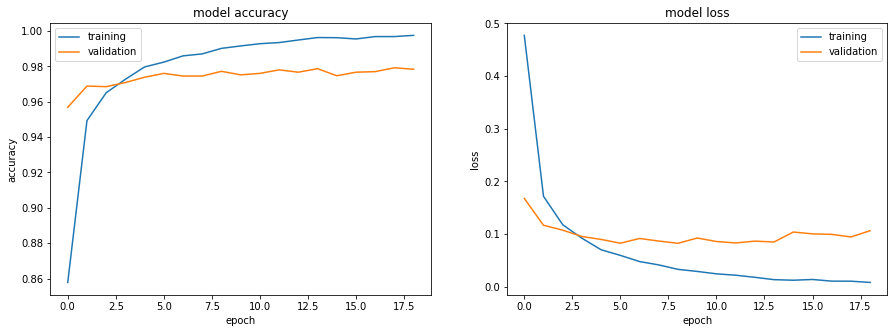

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## MNIST classifier with encoder

#### Encoder - Decoder architecture

In [9]:
input_img= Input(shape=(image_size,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

encoder = Model(input_img, encoded)
encoder.summary()

autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                callbacks=[es,checkpoint],
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_______________________________

60000/60000 [==============================] - 3s 45us/step - loss: 0.1194 - accuracy: 0.8106 - val_loss: 0.1193 - val_accuracy: 0.8089
Epoch 40/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.1189 - accuracy: 0.8106 - val_loss: 0.1166 - val_accuracy: 0.8110
Epoch 41/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.1183 - accuracy: 0.8107 - val_loss: 0.1160 - val_accuracy: 0.8102
Epoch 42/500
60000/60000 [==============================] - 3s 52us/step - loss: 0.1178 - accuracy: 0.8108 - val_loss: 0.1177 - val_accuracy: 0.8108
Epoch 43/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.1172 - accuracy: 0.8108 - val_loss: 0.1159 - val_accuracy: 0.8092
Epoch 44/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.1167 - accuracy: 0.8109 - val_loss: 0.1150 - val_accuracy: 0.8112
Epoch 45/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.1162 - accuracy: 0.8110 - val_loss: 

60000/60000 [==============================] - 3s 44us/step - loss: 0.1016 - accuracy: 0.8129 - val_loss: 0.0998 - val_accuracy: 0.8118
Epoch 95/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.1014 - accuracy: 0.8129 - val_loss: 0.1004 - val_accuracy: 0.8119
Epoch 96/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.1012 - accuracy: 0.8130 - val_loss: 0.1008 - val_accuracy: 0.8126
Epoch 97/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.1011 - accuracy: 0.8130 - val_loss: 0.1000 - val_accuracy: 0.8120
Epoch 98/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.1009 - accuracy: 0.8130 - val_loss: 0.0997 - val_accuracy: 0.8126
Epoch 99/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.1008 - accuracy: 0.8130 - val_loss: 0.1000 - val_accuracy: 0.8124
Epoch 100/500
60000/60000 [==============================] - 3s 44us/step - loss: 0.1006 - accuracy: 0.8130 - val_loss:

Epoch 149/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0953 - accuracy: 0.8136 - val_loss: 0.0961 - val_accuracy: 0.8129
Epoch 150/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0951 - accuracy: 0.8136 - val_loss: 0.0942 - val_accuracy: 0.8125
Epoch 151/500
60000/60000 [==============================] - 3s 45us/step - loss: 0.0952 - accuracy: 0.8136 - val_loss: 0.0952 - val_accuracy: 0.8122
Epoch 152/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0951 - accuracy: 0.8136 - val_loss: 0.0950 - val_accuracy: 0.8126
Epoch 153/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.0951 - accuracy: 0.8136 - val_loss: 0.0949 - val_accuracy: 0.8128
Epoch 00153: early stopping


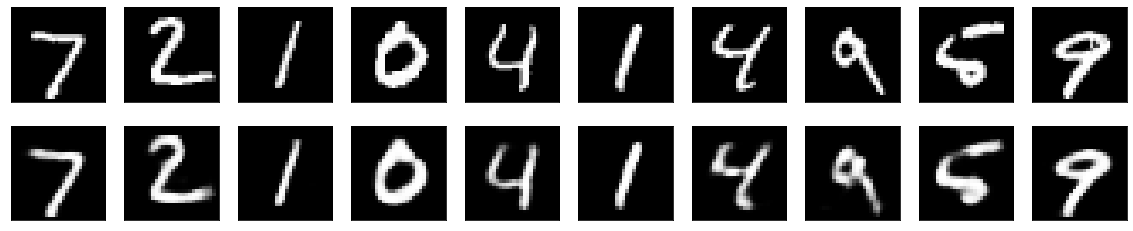

In [85]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#### Stack up with classifier

In [6]:
input_img = Input((image_size,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

out = Dense(num_classes, activation='softmax')(encoded)

model = Model(input_img, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
checkpoint= ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test, 
                                 y_test, 
                                 verbose=True)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/500
54000/54000 [==============================] - 1s 16us/ste

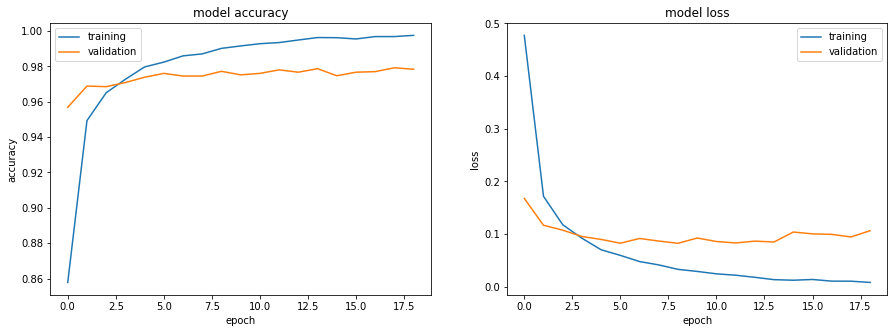

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## MNIST classifier with denoising autoencoder

#### Add gaussian noise to the images

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# convert y to categorical variable (vector)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

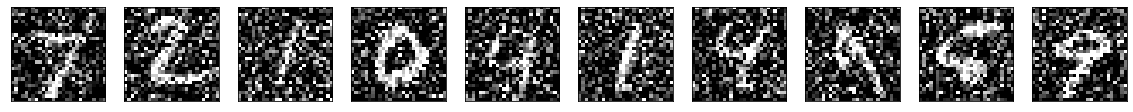

In [58]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Encoder - decoder architecture

In [1]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                callbacks=[es,checkpoint],
                validation_data=(x_test_noisy, x_test))

NameError: name 'Input' is not defined

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Stack up with classifier

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

flat = Flatten()(encoded)
den = Dense(128, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(den)

model = Model(input_img, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)
checkpoint= ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    callbacks=[es,checkpoint],
                    validation_split=.1)

loss, accuracy  = model.evaluate(x_test_noisy, 
                                 y_test, 
                                 verbose=1)

print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % accuracy)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()